# Classification
## 1.Decision Tree

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [10]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [11]:
x=df[['age','fare','pclass','sex']]
y=df['survived']

In [12]:
x=pd.get_dummies(x,columns=['sex'])

In [13]:
x.isnull().sum()

age           177
fare            0
pclass          0
sex_female      0
sex_male        0
dtype: int64

In [14]:
#filling missing values
x['age'].fillna(x['age'].mean(),inplace=True)

In [15]:
x.isnull().sum()

age           0
fare          0
pclass        0
sex_female    0
sex_male      0
dtype: int64

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [17]:
model=DecisionTreeClassifier()
#fitting the model
model.fit(x_train,y_train)
predictions=model.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7988826815642458

[Text(0.4876182309531234, 0.975, 'X[3] <= 0.5\ngini = 0.473\nsamples = 712\nvalue = [439, 273]'),
 Text(0.1832190001039393, 0.925, 'X[0] <= 14.0\ngini = 0.31\nsamples = 465\nvalue = [376, 89]'),
 Text(0.02660846065897516, 0.875, 'X[2] <= 2.5\ngini = 0.492\nsamples = 32\nvalue = [14, 18]'),
 Text(0.019956345494231368, 0.825, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.03326057582371895, 0.825, 'X[1] <= 20.825\ngini = 0.444\nsamples = 21\nvalue = [14, 7]'),
 Text(0.01330423032948758, 0.775, 'X[0] <= 10.0\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.00665211516474379, 0.725, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.019956345494231368, 0.725, 'X[0] <= 11.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.01330423032948758, 0.675, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.02660846065897516, 0.675, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.05321692131795032, 0.775, 'X[0] <= 3.5\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(0.046564

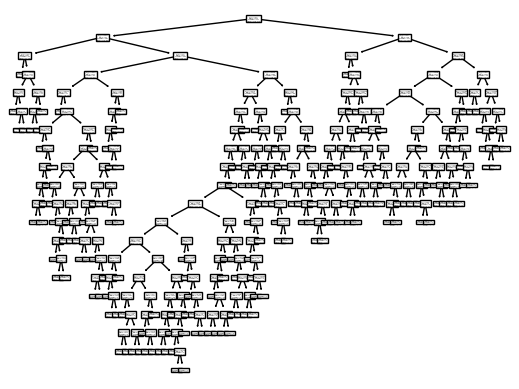

In [20]:
#graph decision tree
from sklearn import tree
tree.plot_tree(model)

In [22]:
model.predict([[22,7.25,1,1,0]])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

<AxesSubplot:>

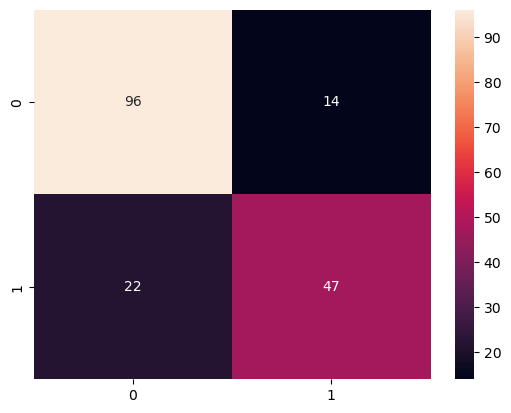

In [25]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
sns.heatmap(cm,annot=True)

In [26]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
predictions=model.predict(x_test)
accuracy_score(y_test,predictions)

0.8044692737430168

In [27]:
confusion_matrix(y_test,predictions)

array([[93, 17],
       [18, 51]])

In [33]:
# k nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)
predictions=model.predict(x_test)
accuracy_score(y_test,predictions)
confusion_matrix(y_test,predictions)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([[91, 19],
       [29, 40]])

In [34]:
#random forest
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
predictions=model.predict(x_test)
accuracy_score(y_test,predictions)

0.8324022346368715

In [35]:
#naive bayes
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
predictions=model.predict(x_test)
accuracy_score(y_test,predictions)

0.7821229050279329